<a href="https://colab.research.google.com/github/amirhoseinRj/Digikala-sales-prediction/blob/master/digikala_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fastai --upgrade

     |████████████████████████████████| 358kB 14.4MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.tabular.all import *

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'digi_sale/'

Mounted at /content/gdrive


In [ ]:
train_df = pd.read_csv('/content/gdrive/My Drive/digikala sales prediction/train.csv')
train_df.head(5)

,id,date,seller,item,sales
0,0,2015-05-01,1,1,21
1,1,2015-05-01,2,1,45
2,2,2015-05-01,3,1,28
3,3,2015-05-01,4,1,34
4,4,2015-05-01,5,1,21


In [ ]:
test_df = pd.read_csv('/content/gdrive/My Drive/digikala sales prediction/test.csv')
test_df.head(5)

,id,date,seller,item
0,0,2020-04-04,1,1
1,1,2020-04-04,2,1
2,2,2020-04-04,3,1
3,3,2020-04-04,4,1
4,4,2020-04-04,5,1


In [ ]:
from fastai.tabular.data import *

In [ ]:
train = add_datepart(train_df, "date")
test = add_datepart(test_df, "date")

In [ ]:
train.head()

,id,seller,Week,item,sales,Year,Month,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0,1,18,1,21,2015,5,1,4,121,False,True,False,False,False,False,1430438400
1,1,2,18,1,45,2015,5,1,4,121,False,True,False,False,False,False,1430438400
2,2,3,18,1,28,2015,5,1,4,121,False,True,False,False,False,False,1430438400
3,3,4,18,1,34,2015,5,1,4,121,False,True,False,False,False,False,1430438400
4,4,5,18,1,21,2015,5,1,4,121,False,True,False,False,False,False,1430438400


In [ ]:
procs=[FillMissing, Categorify, Normalize]

In [ ]:
cat_vars = ['seller', 'Dayofweek', 'Year', 'Month', 'Day', 'item']
cont_vars = []
dep_var = 'sales'

In [ ]:
data = TabularDataLoaders.from_df(train, path='.', cat_names=cat_vars, cont_names=cont_vars, procs=procs, valid_idx = list(range(800000,900000)) ,y_names = dep_var , bs = 128)

In [ ]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, metrics=accuracy)

In [ ]:
learn2 = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.06, metrics=accuracy)

In [ ]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(11, 6)
    (1): Embedding(8, 5)
    (2): Embedding(7, 5)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(46, 14)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=48, out_features=1000, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1000, out_features=500, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=500, out_features=1, bias=True)
    )
  )
)

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.00363078061491251)

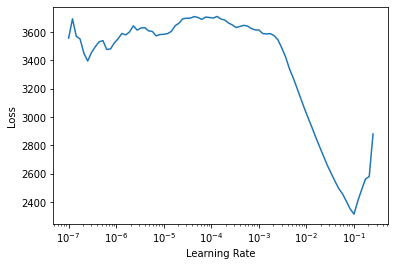

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 3e-2, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,93.351868,531.001892,0.000000,01:09
1,89.326080,530.611267,0.000000,01:08
2,80.982368,519.837280,0.000000,01:08
3,66.508873,515.235718,0.000000,01:06
4,57.657768,694.010498,0.000000,01:06


In [ ]:
dl = learn.dls.test_dl(test)

In [ ]:
x = learn.get_preds(dl=dl)
a = list()
for i in range(len(x[0])):
  a.append(x[0][i].item())
test['sales'] = a

In [ ]:
prediction = test.copy()

In [ ]:
prediction

,id,seller,Week,item,Year,Month,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,sales
0,0,1,14,1,2020,4,4,5,95,False,False,False,False,False,False,1585958400,38.009098
1,1,2,14,1,2020,4,4,5,95,False,False,False,False,False,False,1585958400,51.927322
2,2,3,14,1,2020,4,4,5,95,False,False,False,False,False,False,1585958400,46.325024
3,3,4,14,1,2020,4,4,5,95,False,False,False,False,False,False,1585958400,42.813789
4,4,5,14,1,2020,4,4,5,95,False,False,False,False,False,False,1585958400,30.965132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,12995,6,18,50,2020,4,29,2,120,False,False,False,False,False,False,1588118400,25.768808
12996,12996,7,18,50,2020,4,29,2,120,False,False,False,False,False,False,1588118400,22.596062
12997,12997,8,18,50,2020,4,29,2,120,False,False,False,False,False,False,1588118400,41.775902
12998,12998,9,18,50,2020,4,29,2,120,False,False,False,False,False,False,1588118400,37.117458


In [ ]:
prediction.drop(labels = ['seller', 'Week', 'item', 'Year', 'Month', 'Day' , 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed']
                ,axis=1, inplace=True)

In [ ]:
prediction.to_csv('/content/gdrive/My Drive/digikala sales prediction/predictions.csv' , index = False)

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.00363078061491251)

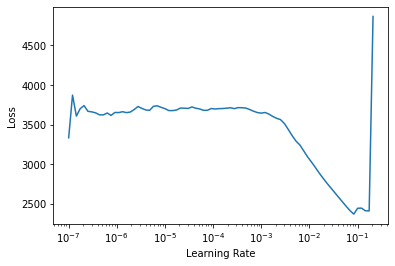

In [ ]:
learn2.lr_find()

In [ ]:
learn.fit_one_cycle(10, 1e-2, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,65.925964,623.934387,0.000000,01:10
1,68.783699,511.358093,0.000000,01:08
2,74.503502,504.900635,0.000000,01:07
3,74.394638,531.495056,0.000000,01:07
4,72.344109,496.030884,0.000000,01:05
5,69.686508,500.709229,0.000000,01:05
6,67.917152,602.465332,0.000000,01:04
7,61.124058,641.354858,0.000000,01:04
8,58.406952,800.096863,0.000000,01:04
9,57.596062,699.003174,0.000000,01:03


In [ ]:
dl2 = learn.dls.test_dl(test)
x2 = learn2.get_preds(dl=dl2)
a2 = list()
for i in range(len(x2[0])):
  a2.append(x2[0][i].item())
test['sales'] = a2
prediction2 = test.copy()
prediction2.drop(labels = ['seller', 'Week', 'item', 'Year', 'Month', 'Day' , 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed']
                ,axis=1, inplace=True)
prediction2.to_csv('/content/gdrive/My Drive/digikala sales prediction/predictions2.csv' , index = False)